<a href="https://colab.research.google.com/github/ameya932/world_happiness_report/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

whr2021_report = report

whr2021_report_raw = df

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/DataForFigure2.1WHR2021C2.xls"
df = pd.read_excel(path)

**DATA PREPARATION AND CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532832,0.058764,5.648008,5.417655,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477,2.430343,0.977153,0.793315,0.520132,0.498687,0.178091,0.135112,2.430343
std,1.073923,0.022011,1.054320,1.094875,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266,0.000000,0.404777,0.258840,0.212971,0.137885,0.098277,0.114322,0.537653
min,2.522900,0.025583,2.596468,2.449332,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959,2.430343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648460
25%,4.851800,0.043369,4.991074,4.705666,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607,2.430343,0.665774,0.646990,0.356634,0.409224,0.105473,0.060408,2.138343
50%,5.533500,0.054181,5.624688,5.413106,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623,2.430343,1.024849,0.832038,0.570849,0.514314,0.164473,0.101220,2.509446
75%,6.255400,0.069863,6.344270,6.127992,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619,2.430343,1.322677,0.996021,0.665236,0.602958,0.239398,0.173931,2.793570
max,7.842100,0.172664,7.904126,7.780075,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343,2.430343,1.750786,1.172279,0.896814,0.715964,0.541250,0.546775,3.482495




* The Ranking consists of 149 countries and there are no null values.




In [6]:
df.sample()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
75,Russia,Commonwealth of Independent States,5.4772,0.032701,5.541294,5.413106,10.188742,0.902866,64.702911,0.718051,-0.111448,0.844619,2.430343,1.241464,0.991886,0.511002,0.409224,0.115272,0.060408,2.147896


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables - levels of GDP, life expectancy, generosity, social support, freedom, and corruption (includes other criterias/variables too)



*   We will drop the statistical columns and the "Explained by: " columns since these have no direct impact on the total score reported for each country, but instead are just a way of explaining for each country the implications/contribution of these variables to the Ladder Score.

*   We will create a copy, so that we dont messup the original dataframe.



In [7]:
ladder_score_dystopia = df['Ladder score in Dystopia'][0]
report = df.copy()
report = report.loc[:,:'Perceptions of corruption']
report.drop(columns=['Standard error of ladder score','upperwhisker','lowerwhisker'],inplace=True)
report.set_index('Country name',inplace=True)
rank = np.arange(1,len(report)+1)
report.insert(0,'Rank',rank)
report.sample(3)

,Rank,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,,,
Cambodia,114,Southeast Asia,4.8304,8.360371,0.764582,62.000336,0.958579,0.033953,0.843456
Australia,11,North America and ANZ,7.1835,10.795605,0.940149,73.900093,0.913650,0.158530,0.442292
Mauritania,134,Sub-Saharan Africa,4.2274,8.541807,0.794953,57.160580,0.561225,-0.106402,0.730913


**EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
report.describe()

,Rank,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.000000,5.532832,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477
std,43.156691,1.073923,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266
min,1.000000,2.522900,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959
25%,38.000000,4.851800,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607
50%,75.000000,5.533500,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623
75%,112.000000,6.255400,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619
max,149.000000,7.842100,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343


Apart from 'Logged GDP per capita' and 'Healthy life expectancy', all are within a scale of 0 to 1 or -1 to 1. We shall try to understand the distribution of the data available.

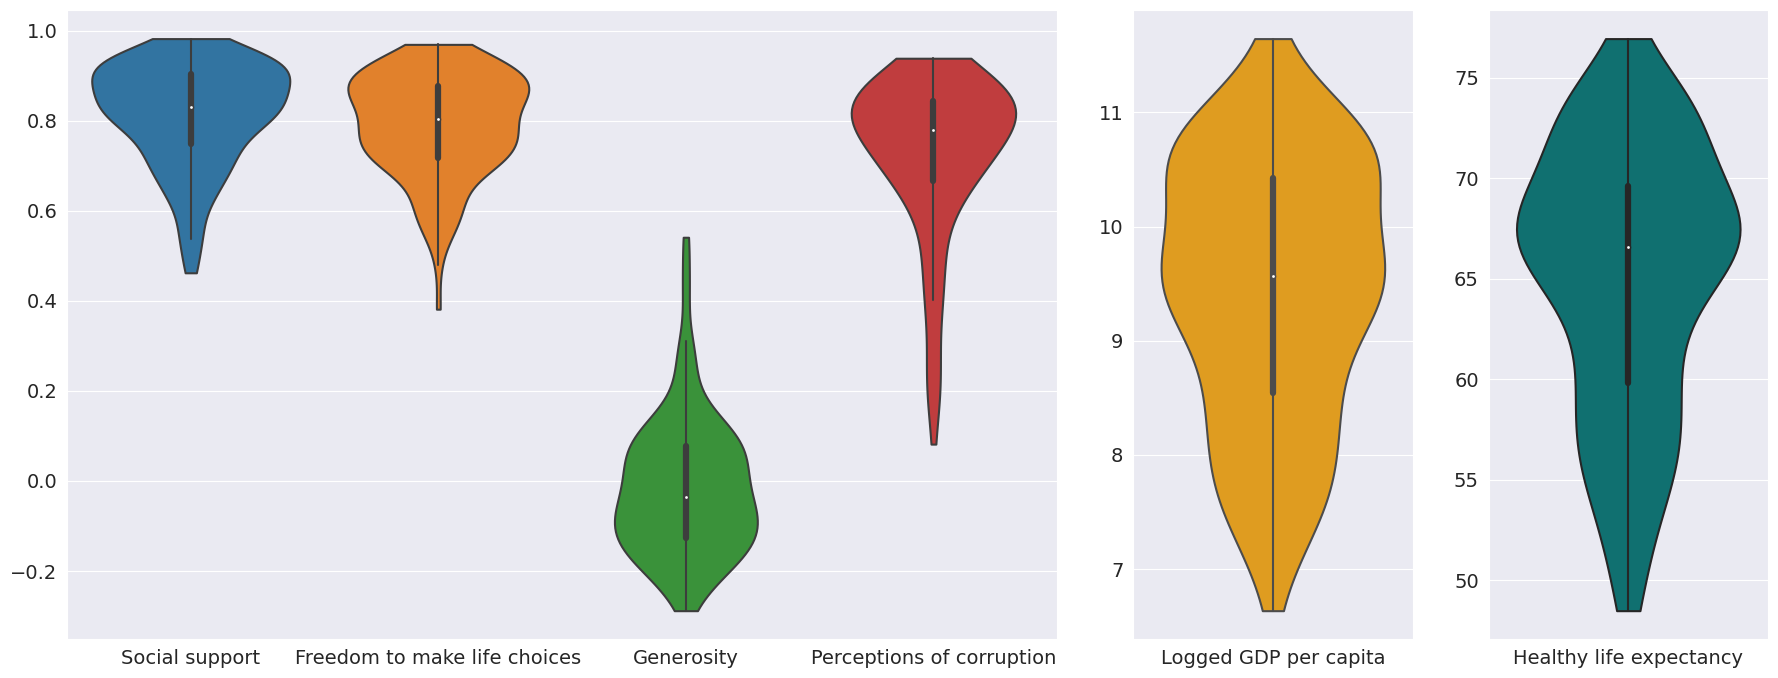

In [10]:
fig, ax = plt.subplots(1,5,figsize=(18,7))
gs = ax[0].get_gridspec()
for axes in ax[:-2]:
    axes.remove()
axbig = fig.add_subplot(gs[:-2])

sns.violinplot(data=report.loc[:, ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']],
               orient='v',
               cut=0,
               ax=axbig)
sns.violinplot(data=report.loc[:, ['Logged GDP per capita']], orient='v', cut=0, ax=ax[-2], color='orange')
sns.violinplot(data=report.loc[:, ['Healthy life expectancy']], orient='v', cut=0, ax=ax[-1], color='teal')
fig.tight_layout()
plt.show()

The violinplots gives us an idea of the distribution of the various Ladder Score variables across countries.

In general, "Social Support" & "Freedom to make life choices" have a higher score, which is actually great. But, "Generosity" is fairly low in most countries and the "perception of corrruption" is on the higher side. The "life expectancy" ranges from about 48 to 77 years and the "GDP per capita" has a huge Disparity across various countries.

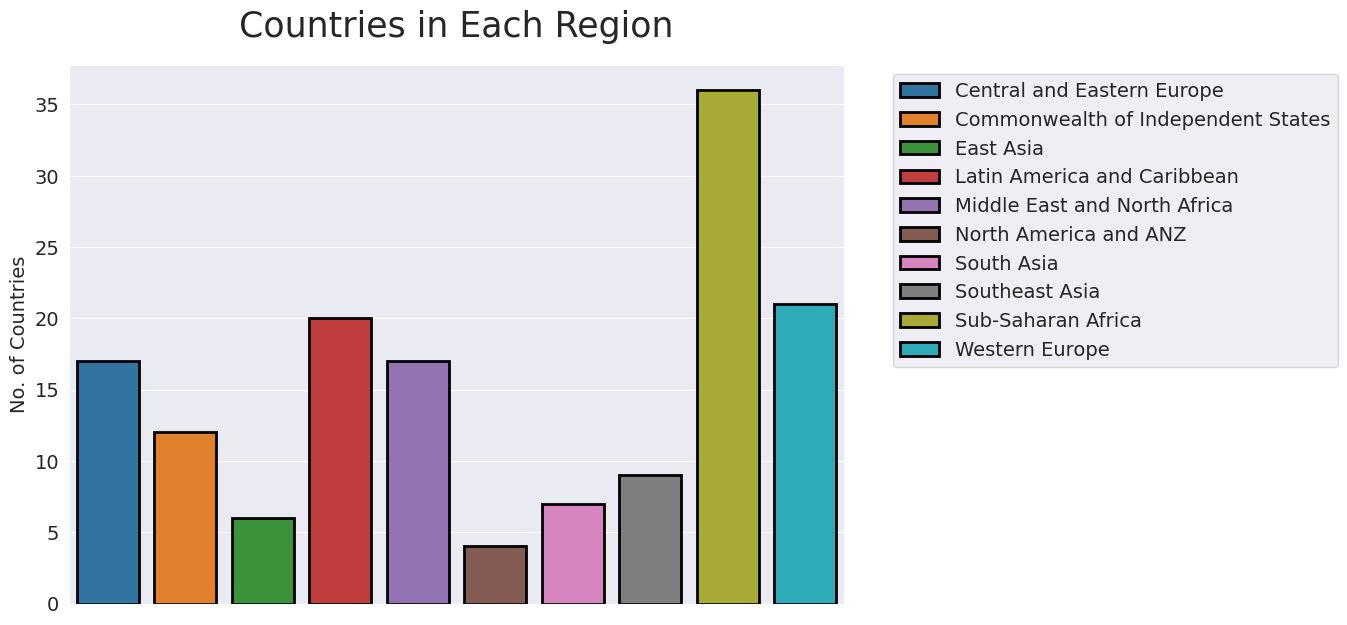

In [11]:
country_regions = report.groupby('Regional indicator')[['Ladder score']].count().reset_index()
country_regions.rename(columns={'Ladder score':'No. of Countries'},inplace=True)
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(data=country_regions,hue='Regional indicator',x='Regional indicator',y='No. of Countries',dodge=False,ec='k',lw=2)
ax.set_xlabel(None)
ax.xaxis.set_ticklabels([])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Countries in Each Region',fontsize=25,pad=20)
plt.show()

"North America and ANZ" region has the least number of countries, whereas "Sub-Saharan Africa" region has the highest numer of countries, almost twice as many as the region with the 2nd most number of countries,Western Europe.

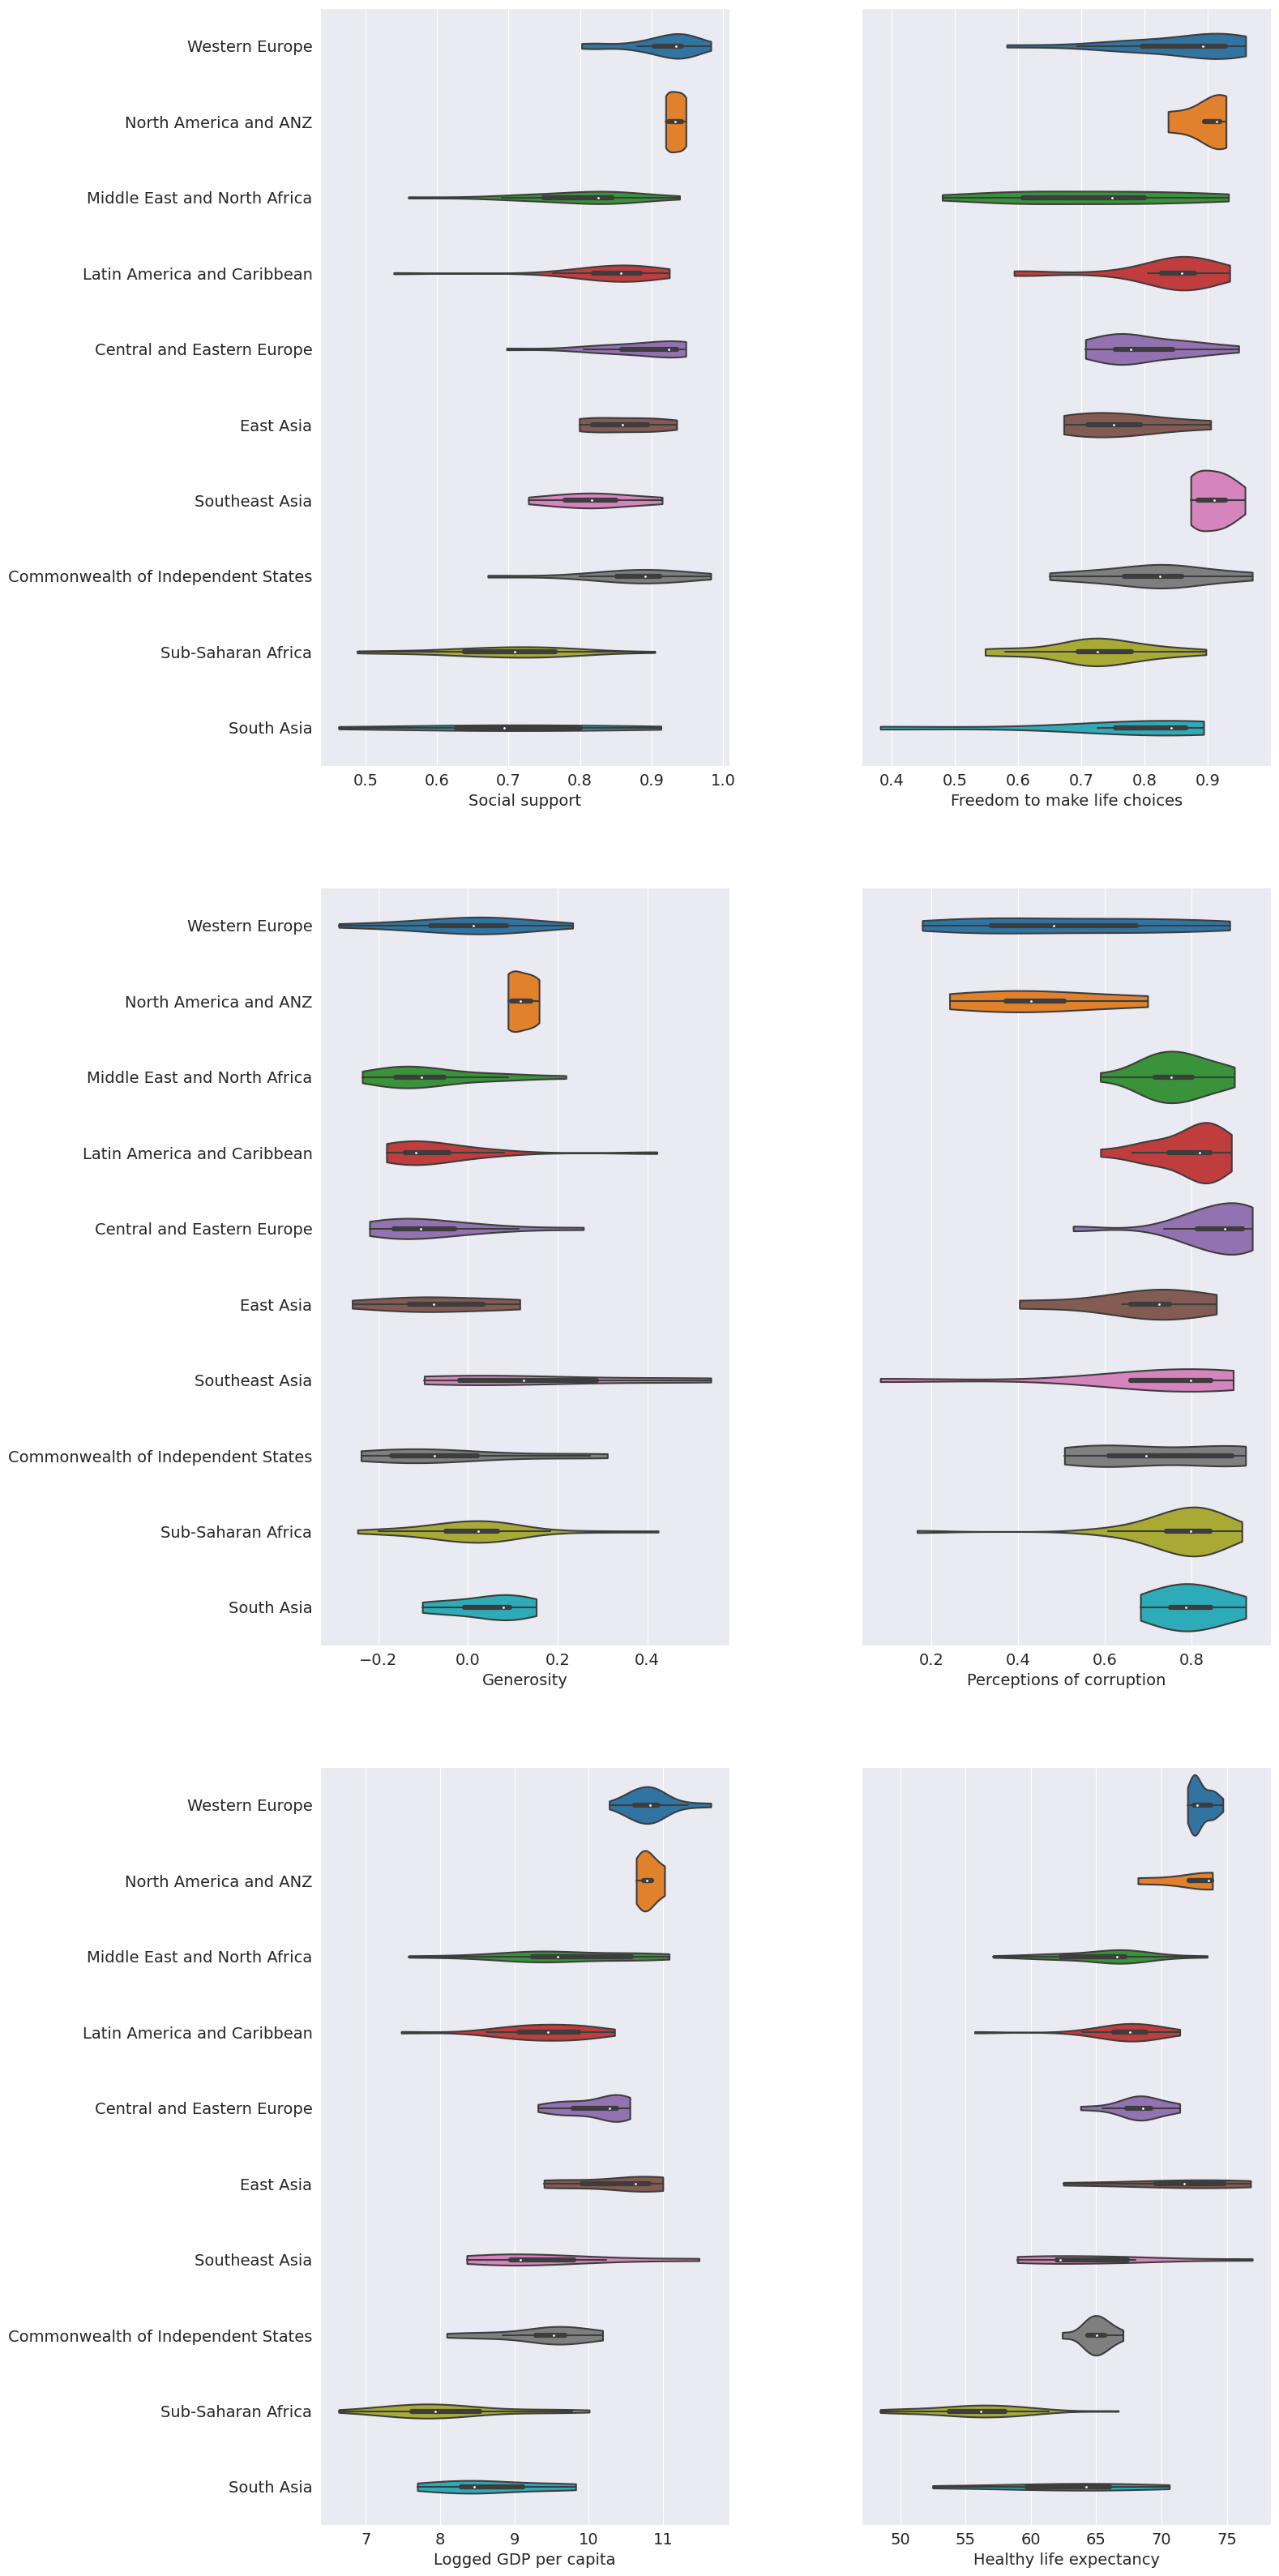

In [12]:
fig, ax = plt.subplots(3,2,figsize=(16,32),sharey=True)
for i,criteria in enumerate(['Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','Logged GDP per capita','Healthy life expectancy']):
    
    p1 = sns.violinplot(data=report,x=criteria,orient='h',cut=0,y='Regional indicator',ax=ax.flatten()[i])
    p1.set_ylabel(None)
    fig.tight_layout(w_pad=8,h_pad=5)



*   All the countries in 'North America and ANZ' region has a similar Social Support score and is above 0.9 . 'South Asia' countries have the widest distribution of scores ranging from just over 0.4 to 0.9.
*   'North America and ANZ' & 'Southeast Asia' regions have a narrow disribution of Freedom to make Life Choices scores with all of it rating falling above 0.8. Whereas 'Middle East and North Africa' region has the widest distribution of the score from less than 0.3 to over 0.9

*   'North America and ANZ' is the only region with all the countries having a positive Generosity score. 'Southeast Asia' countries has the most varying scores across countries and also the highest scores across the world.
*   'Western Europe' and 'North America and ANZ' regions has the two most widest distribution of Perception of Corruption scores, and also have a lower score compared to other regions. All other regions tend to have a high score.


*   'Western Europe' and 'North America and ANZ' has all its countries with a Logged GDP per capita of more than 10. Most of the countries of 'Sub-Saharan Africa' has the least Logged GDP per capita.
*   All the countries in 'Europe' has a life expectancy of above 70. Most countries in 'Sub Saharan Africa' has a life expectancy below 60.Countries in 'South Asia' has a life expectancy in the range of near 52 to 71.

Overall, people in the 'North America and ANZ' & 'Western Europe' tend to have a better score in the happiness measuring criterias according to WHR 2021 data and 'Southeast Asia' has some of the highest ratings.







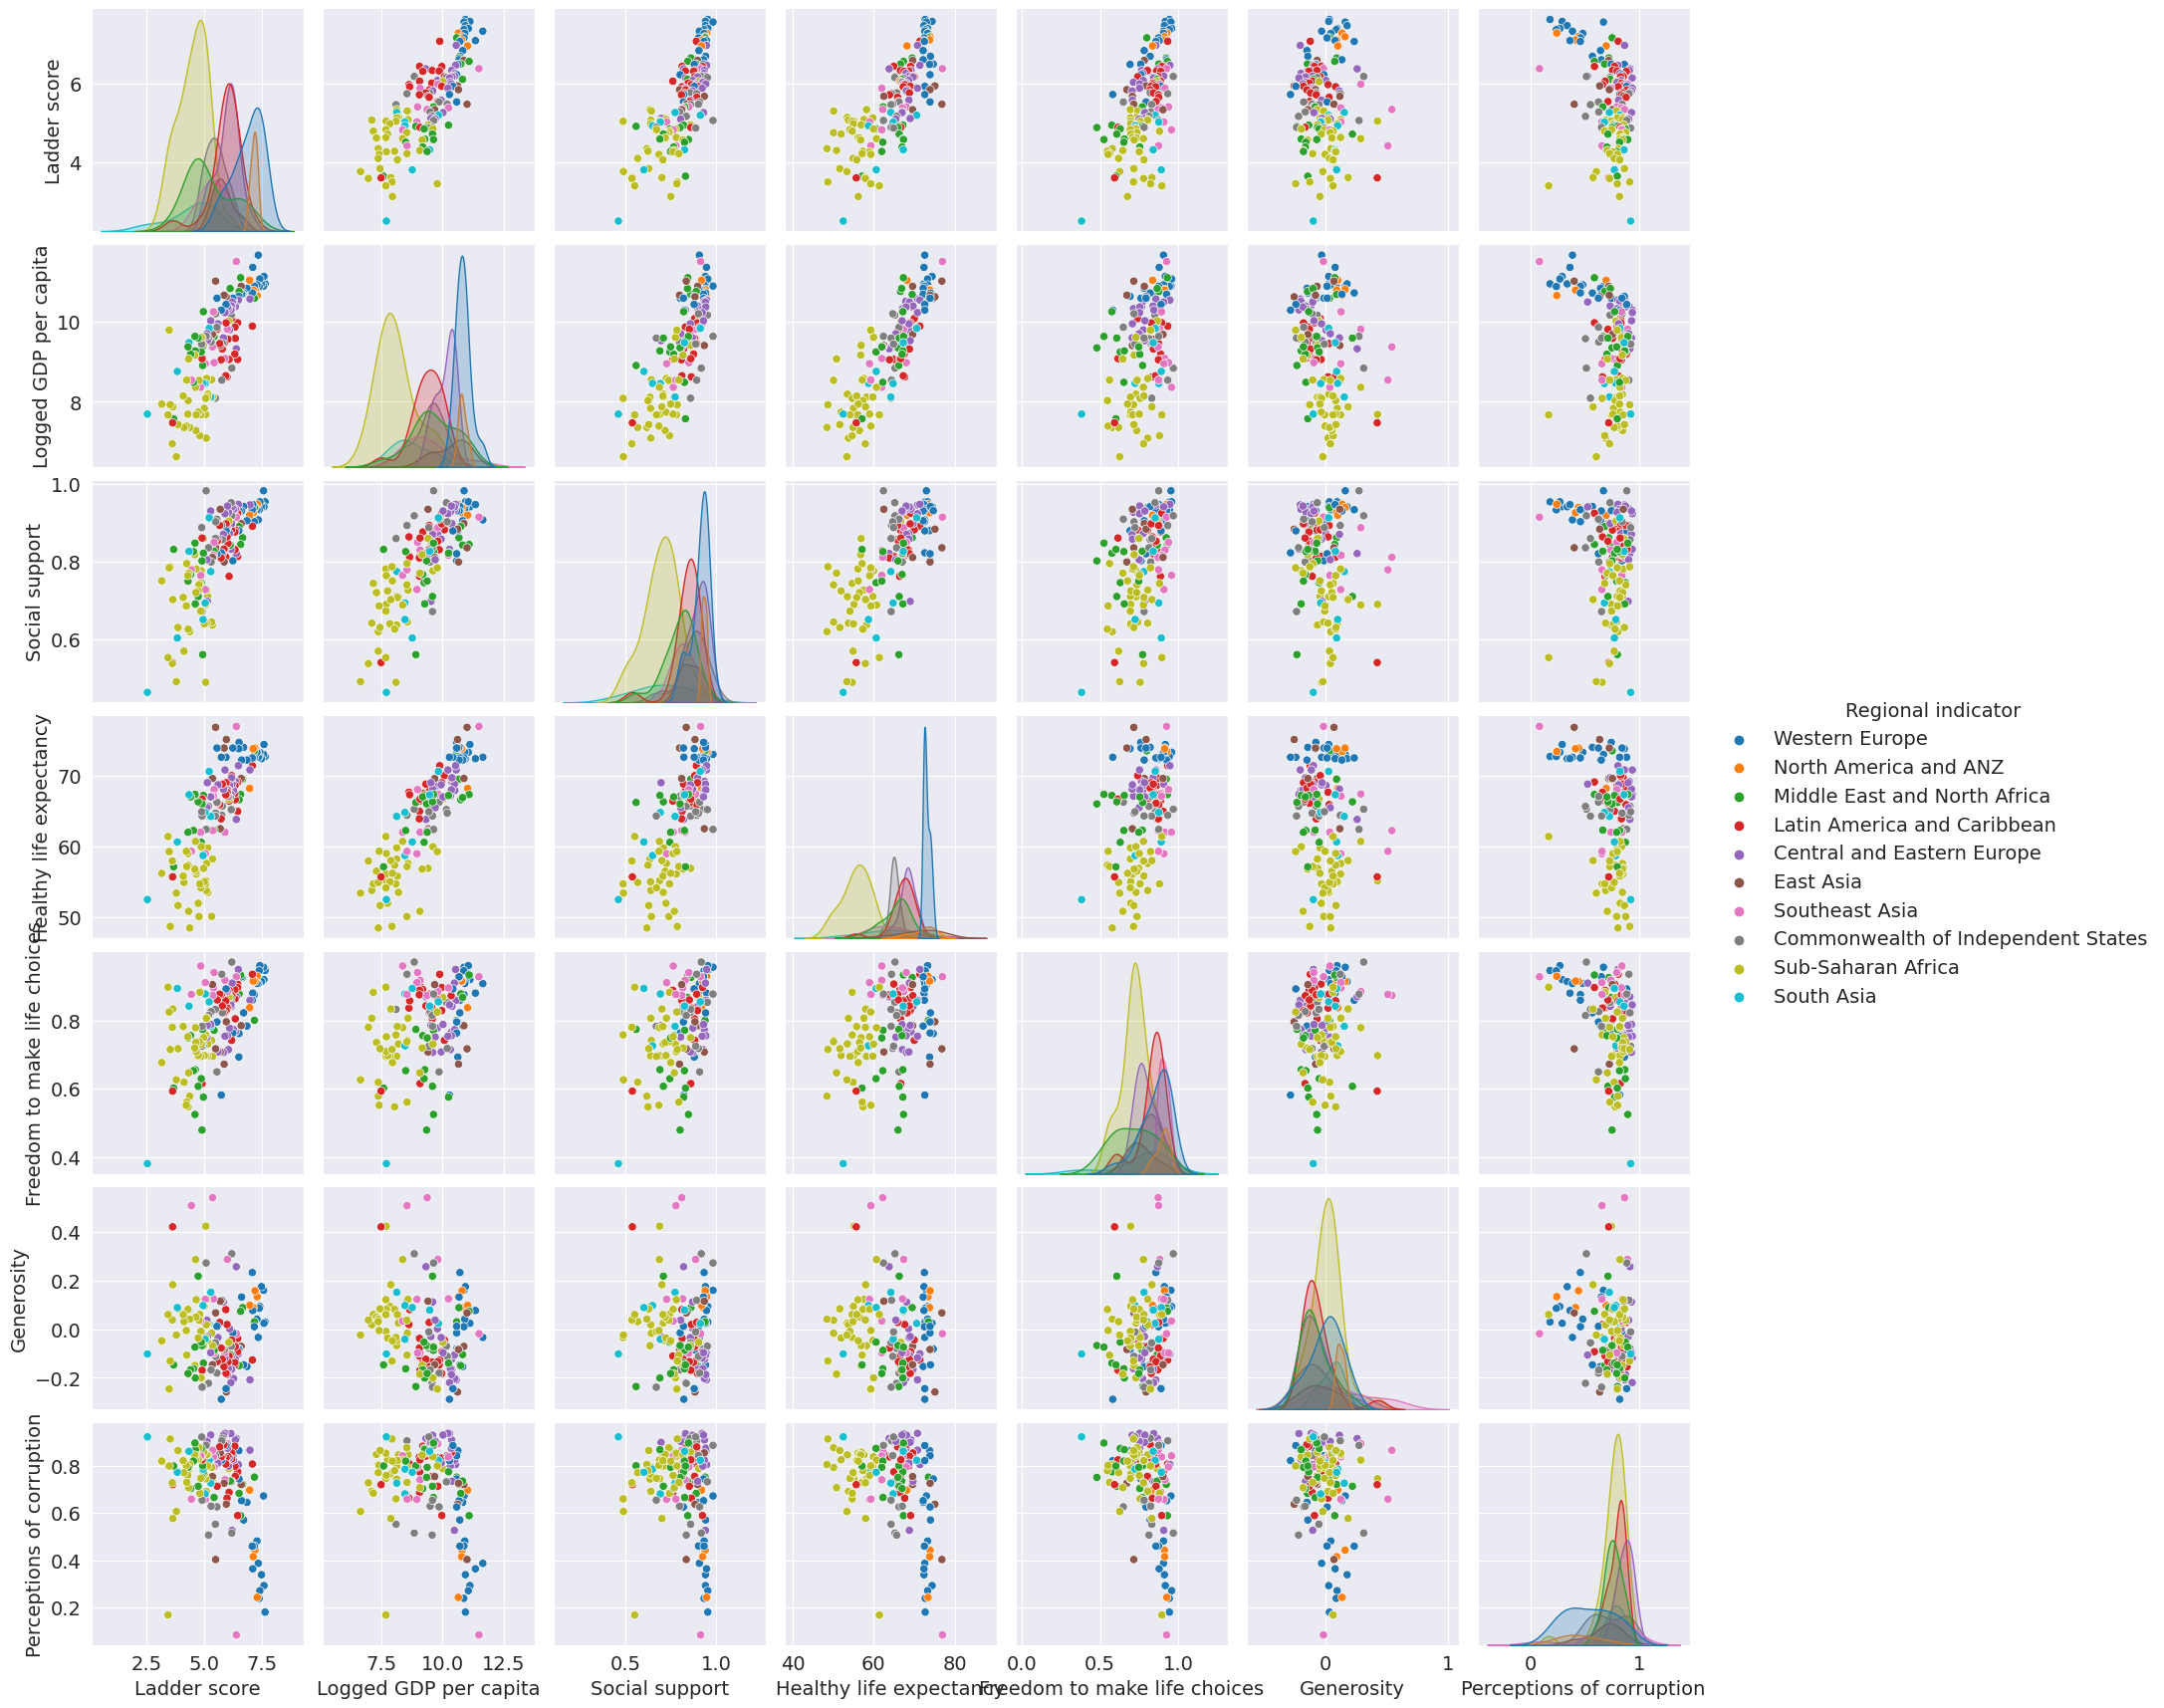

In [14]:
sns.pairplot(report.iloc[1:,1:],kind='scatter',hue='Regional indicator')

The Ladder Score, GDP per capita, Social support and Life Expectancy seems to have a positive correlation between each of them. The relation between other variables are a little unclear.

**NOW, LET US ANSWER SOME QUESTIONS**

Q.1) How are the key variables correlated with the Ladder Score or How are the key variables related with the Ladder Score !?

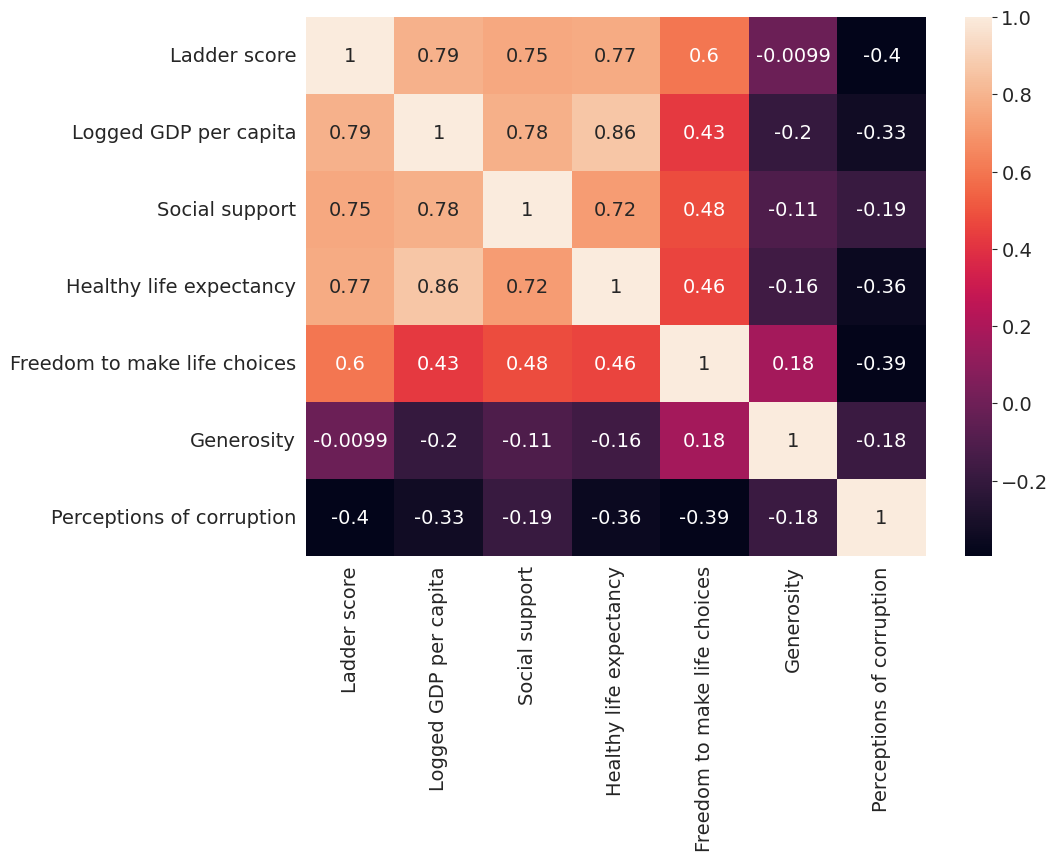

In [15]:
corr_2021 = report.iloc[1:,1:].corr()
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr_2021,annot=True,square=False,ax=ax)
plt.show()